https://github.com/iqiukp/SVDD-Python

In [ ]:
!git clone https://github.com/iqiukp/SVDD-Python.git

Cloning into 'SVDD-Python'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 122 (delta 37), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (122/122), 5.82 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
!pip install -r requirements.txt

  Using cached cvxopt-1.2.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached matplotlib-3.4.2-cp310-cp310-linux_x86_64.whl
  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached scikit-learn-1.0.1.tar.gz (6.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit_learn: filename=scikit_learn-1.0.1-cp310-cp310-linux_x86_64.whl size=25866740 sha256=f8844b175a1b1b2c195c35fd08573819746beecadc3ddf8f9ef0d6257e3e5be6
  Stored in directory: /root/.cache/pip/wheels/b9/52/71/bb62d82a2b50c3c07fc7595c9cecbc696734d889da56cf0de6
Successfully built scikit_learn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: cvxopt
    Found existing installation: cvxopt 1.3.1
    Uninstalling

In [ ]:
import os

os.chdir("SVDD-Python")

### SVDD Model Fitting Using Nonlinear Principal Component

The KPCA algorithm is used to reduce the dimension of the original data.



*** Fitting of the SVDD model is completed. ***

running time         = 0.0559 seconds
kernel function      = rbf
iterations           = 10
number of samples    = 100
number of features   = 2
number of SVs        = 15
ratio of SVs         = 15.0000 %
accuracy             = 77.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.0039 seconds
number of samples    = 100
number of alarm      = 53
accuracy             = 77.0000 %




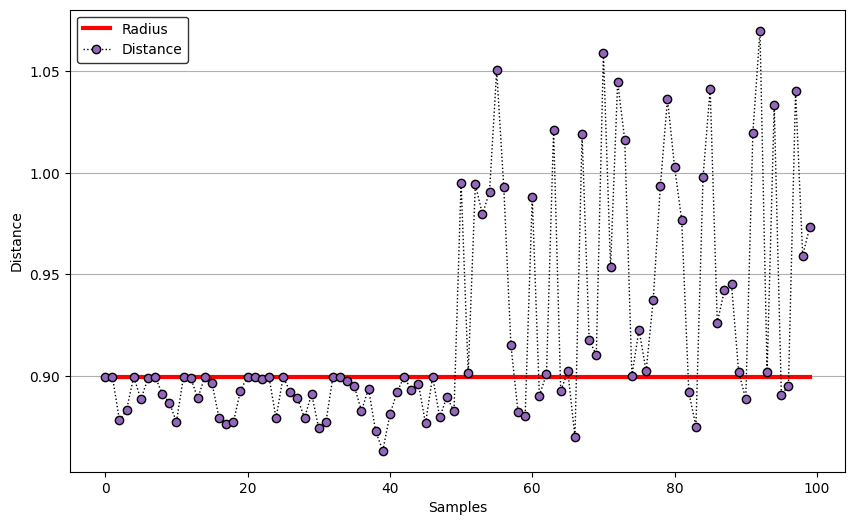

Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.5241 seconds



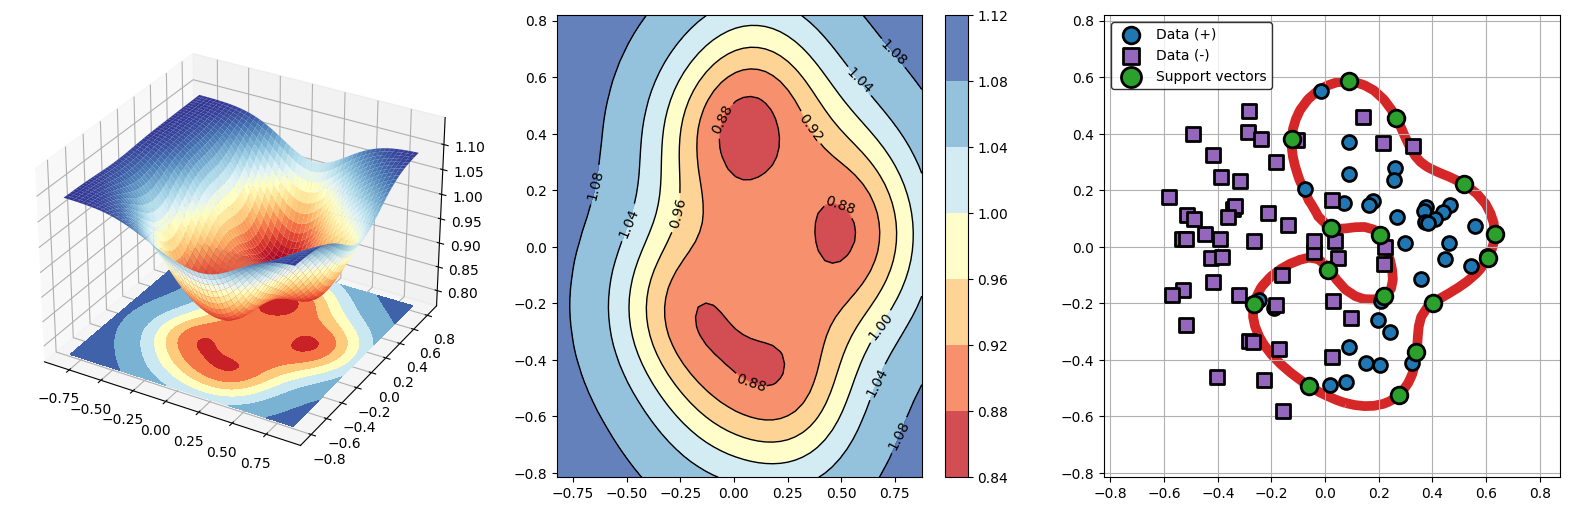

In [ ]:
"""
An example for SVDD model fitting using nonlinear principal component.
The KPCA algorithm is used to reduce the dimension of the original data.
"""

import sys
sys.path.append("..")
import numpy as np
from src.BaseSVDD import BaseSVDD
from sklearn.decomposition import KernelPCA


# create 100 points with 5 dimensions
X = np.r_[np.random.randn(50, 5) + 1, np.random.randn(50, 5)]
y = np.append(np.ones((50, 1), dtype=np.int64),
              -np.ones((50, 1), dtype=np.int64),
              axis=0)

# number of the dimensionality
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)

# fit the SVDD model
svdd = BaseSVDD(C=0.9, gamma=10, kernel='rbf', display='on')

# fit and predict
svdd.fit(X_kpca,  y)
y_test_predict = svdd.predict(X_kpca, y)

# plot the distance curve
radius = svdd.radius
distance = svdd.get_distance(X_kpca)
svdd.plot_distance(radius, distance)

# plot the boundary
svdd.plot_boundary(X_kpca,  y)

### SVDD Model Fitting with Parameter Optimization using PSO (Particle Swarm Optimization)

"scikit-opt" is required in this example.

https://github.com/guofei9987/scikit-opt


In [ ]:
!pip install scikit-opt

/content/SVDD-Python/src/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/content/SVDD-Python/src/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/content/SVDD-Python/src/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/content/SVDD-Python/src/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/content/SVDD-Python/src/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/content/SVDD-Python/src/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/content/SVDD-Python/src/BaseSVDD.

best_x is [0.63067618 0.87639478]
best_y is [0.03571429]


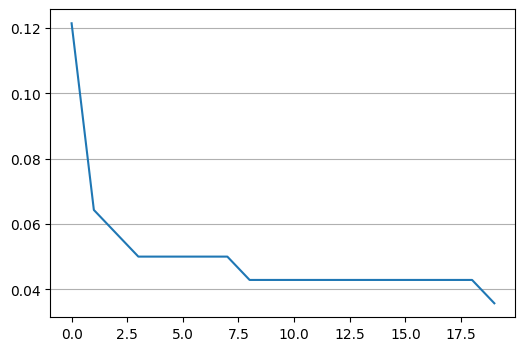

In [ ]:
"""
An example for parameter optimization using PSO(Particle swarm optimization).
"scikit-opt" is required in this examples.
https://github.com/guofei9987/scikit-opt

"""

import sys
sys.path.append("..")
from src.BaseSVDD import BaseSVDD, BananaDataset
from sko.PSO import PSO
import matplotlib.pyplot as plt


# Banana-shaped dataset generation and partitioning
X, y = BananaDataset.generate(number=100, display='off')
X_train, X_test, y_train, y_test = BananaDataset.split(X, y, ratio=0.3)

# objective function
def objective_func(x):
    x1, x2 = x
    svdd = BaseSVDD(C=x1, gamma=x2, kernel='rbf', display='off')
    y = 1-svdd.fit(X_train, y_train).accuracy
    return y

# Do PSO
pso = PSO(func=objective_func, n_dim=2, pop=10, max_iter=20,
          lb=[0.01, 0.01], ub=[1, 3], w=0.8, c1=0.5, c2=0.5)
pso.run()

print('best_x is', pso.gbest_x)
print('best_y is', pso.gbest_y)

# plot the result
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(pso.gbest_y_hist)
ax.yaxis.grid()
plt.show()

### SVDD Model Fitting with drawing Confusion Matrix and ROC Curve



*** Fitting of the SVDD model is completed. ***

running time         = 0.0367 seconds
kernel function      = rbf
iterations           = 9
number of samples    = 100
number of features   = 5
number of SVs        = 15
ratio of SVs         = 15.0000 %
accuracy             = 65.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.0085 seconds
number of samples    = 100
number of alarm      = 46
accuracy             = 65.0000 %




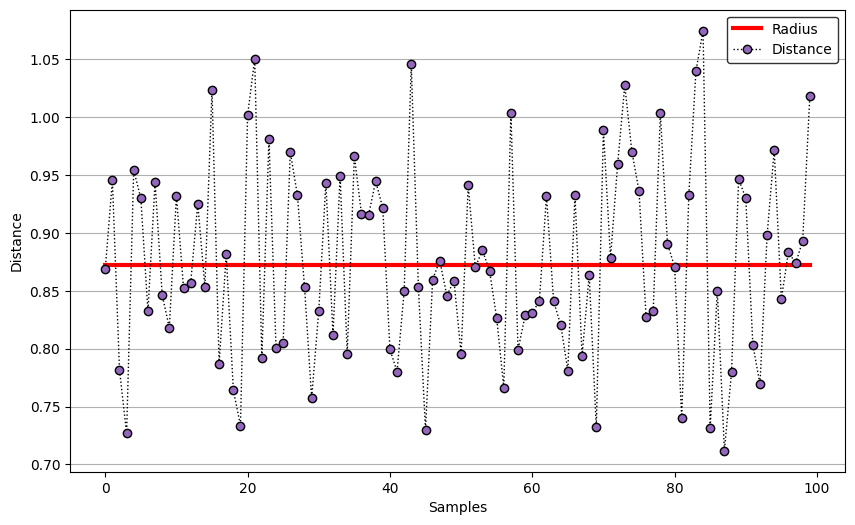

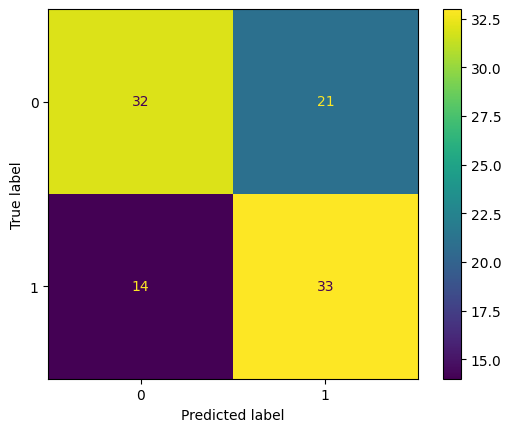

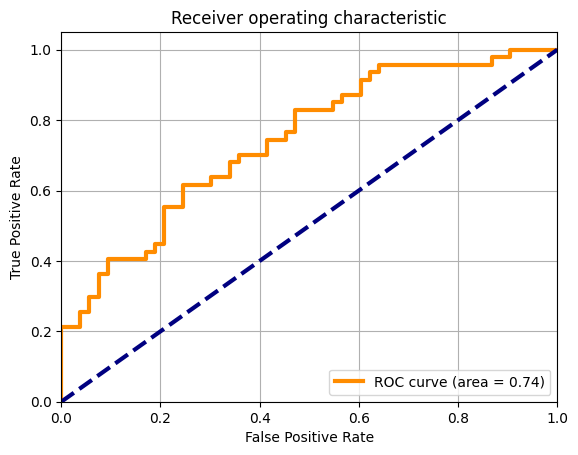

In [ ]:
"""
An example for drawing the confusion matrix and ROC curve
"""
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from src.BaseSVDD import BaseSVDD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# generate data
n = 100
dim = 5
X = np.r_[np.random.randn(n, dim) + 1, np.random.randn(n, dim)]
y = np.append(np.ones((n, 1), dtype=np.int64),
              -np.ones((n, 1), dtype=np.int64),
              axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# SVDD model
svdd = BaseSVDD(C=0.9, gamma=0.1, kernel='rbf', display='on')
svdd.fit(X_train,  y_train)
y_test_predict = svdd.predict(X_test, y_test)

# plot the distance curve
radius = svdd.radius
distance = svdd.get_distance(X_test)
svdd.plot_distance(radius, distance)

# confusion matrix and ROC curve
cm = confusion_matrix(y_test, y_test_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()
y_score = svdd.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=3, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### SVDD Model Fitting with Cross Validation Method



*** Fitting of the SVDD model is completed. ***

running time         = 0.0151 seconds
kernel function      = rbf
iterations           = 10
number of samples    = 112
number of features   = 2
number of SVs        = 11
ratio of SVs         = 9.8214 %
accuracy             = 96.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.0063 seconds
number of samples    = 28
number of alarm      = 9




*** Fitting of the SVDD model is completed. ***

running time         = 0.0201 seconds
kernel function      = rbf
iterations           = 9
number of samples    = 112
number of features   = 2
number of SVs        = 13
ratio of SVs         = 11.6071 %
accuracy             = 91.0714 %




*** Prediction of the provided data is completed. ***

running time         = 0.0034 seconds
number of samples    = 28
number of alarm      = 4




*** Fitting of the SVDD model is completed. ***

running time         = 0.0340 seconds
kernel function      = rbf
iterations    

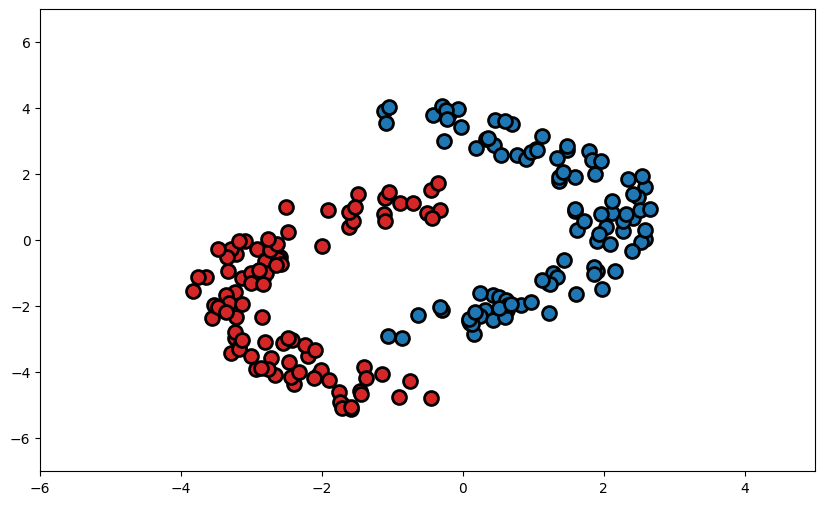

In [ ]:
"""
An example for cross validation
"""
import sys
sys.path.append("..")
from src.BaseSVDD import BaseSVDD, BananaDataset
from sklearn.model_selection import cross_val_score


# Banana-shaped dataset generation and partitioning
X, y = BananaDataset.generate(number=100, display='on')
X_train, X_test, y_train, y_test = BananaDataset.split(X, y, ratio=0.3)

#
svdd = BaseSVDD(C=0.9, gamma=0.3, kernel='rbf', display='on')


# cross validation (k-fold)
k = 5
scores = cross_val_score(svdd, X_train, y_train, cv=k, scoring='accuracy')

#
print("Cross validation scores:")
for scores_ in scores:
    print(scores_)

print("Mean cross validation score: {:4f}".format(scores.mean()))

### SVDD Model Fitting with parameter selection using Grid Search

In [ ]:
"""
An example for parameter selection using grid search
"""
import sys
sys.path.append("..")
from sklearn.datasets import load_wine
from src.BaseSVDD import BaseSVDD, BananaDataset
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit
from sklearn.model_selection import learning_curve, GridSearchCV

# Banana-shaped dataset generation and partitioning
X, y = BananaDataset.generate(number=100, display='off')
X_train, X_test, y_train, y_test = BananaDataset.split(X, y, ratio=0.3)

param_grid = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.2, 0.5], "C": [0.1, 0.5, 1]},
    {"kernel": ["linear"], "C": [0.1, 0.5, 1]},
    {"kernel": ["poly"], "C": [0.1, 0.5, 1], "degree": [2, 3, 4, 5]},
]

svdd = GridSearchCV(BaseSVDD(display='off'), param_grid, cv=5, scoring="accuracy")
svdd.fit(X_train, y_train)
print("best parameters:")
print(svdd.best_params_)
print("\n")

#
best_model = svdd.best_estimator_
means = svdd.cv_results_["mean_test_score"]
stds = svdd.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, svdd.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

best parameters:
{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}


0.921 (+/-0.131) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.921 (+/-0.159) for {'C': 0.1, 'gamma': 0.2, 'kernel': 'rbf'}
0.850 (+/-0.273) for {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
0.929 (+/-0.156) for {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.929 (+/-0.136) for {'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}
0.871 (+/-0.250) for {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}
0.929 (+/-0.156) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.929 (+/-0.136) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.871 (+/-0.250) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.793 (+/-0.249) for {'C': 0.1, 'kernel': 'linear'}
0.757 (+/-0.298) for {'C': 0.5, 'kernel': 'linear'}
0.757 (+/-0.298) for {'C': 1, 'kernel': 'linear'}
0.879 (+/-0.184) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.836 (+/-0.262) for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.807 (+/-0.337) for {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
0.779 (+/-0.376) for {'C': 0.1, 'de

### SVDD Model Fitting with Hybrid Data



*** Fitting of the SVDD model is completed. ***

running time         = 0.1243 seconds
kernel function      = rbf
iterations           = 11
number of samples    = 140
number of features   = 2
number of SVs        = 15
ratio of SVs         = 10.7143 %
accuracy             = 90.0000 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.3718 seconds



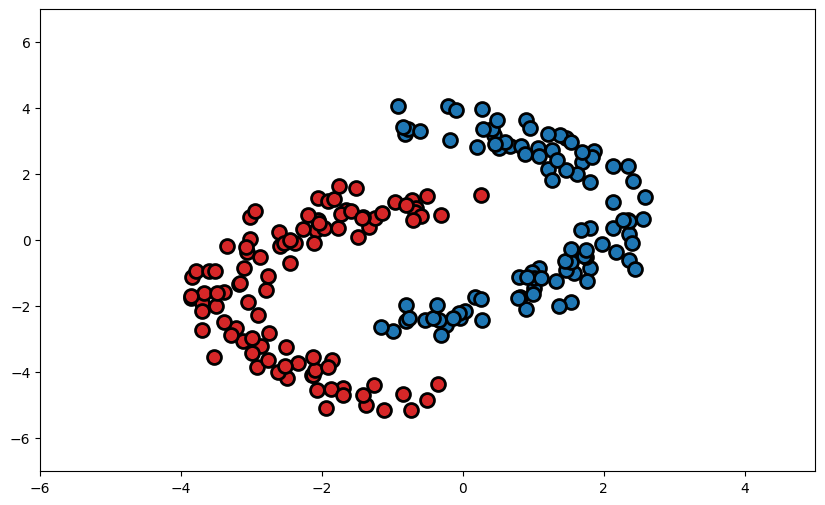

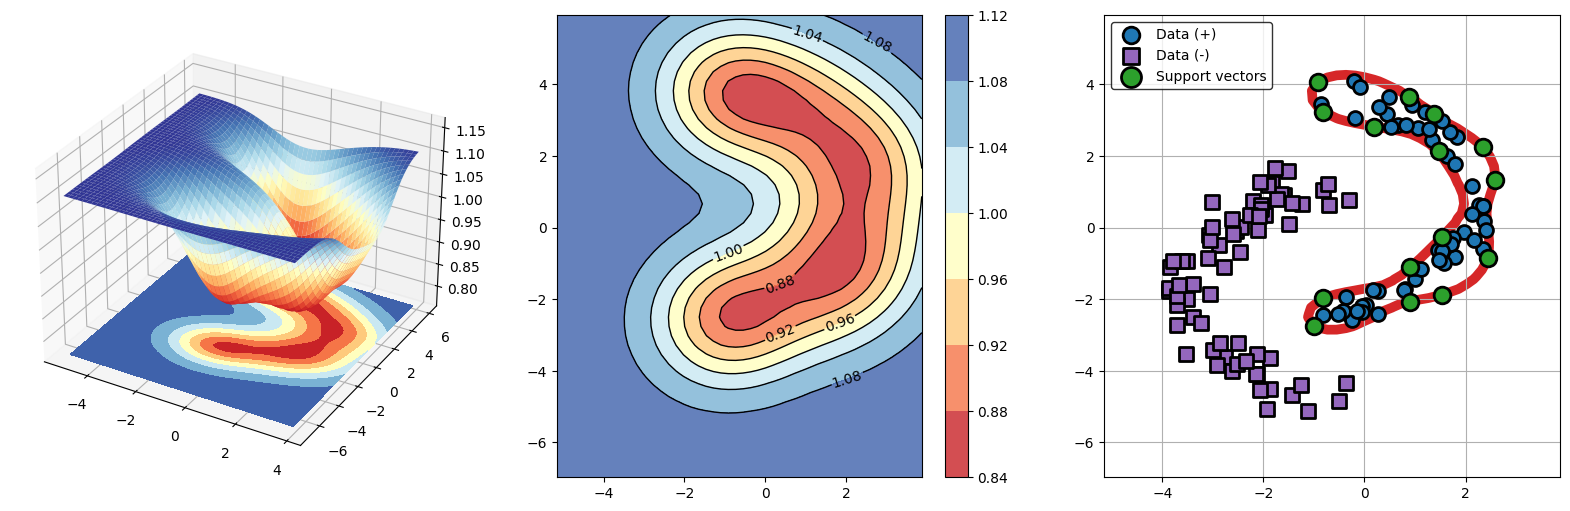



*** Prediction of the provided data is completed. ***

running time         = 0.0102 seconds
number of samples    = 60
number of alarm      = 42
accuracy             = 80.0000 %




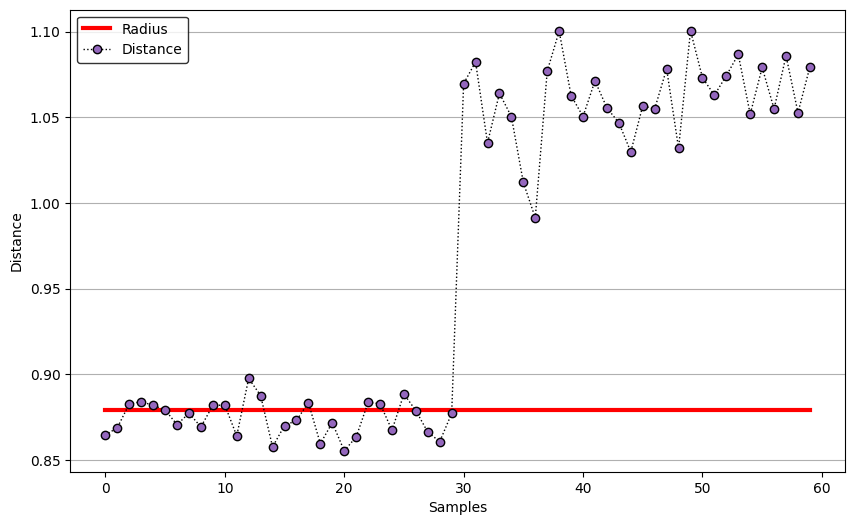

In [ ]:
"""
An example for SVDD model fitting with negataive samples
"""
import sys
sys.path.append("..")
from sklearn.datasets import load_wine
from src.BaseSVDD import BaseSVDD, BananaDataset

# Banana-shaped dataset generation and partitioning
X, y = BananaDataset.generate(number=100, display='on')
X_train, X_test, y_train, y_test = BananaDataset.split(X, y, ratio=0.3)

#
svdd = BaseSVDD(C=0.9, gamma=0.3, kernel='rbf', display='on')

#
svdd.fit(X_train,  y_train)

#
svdd.plot_boundary(X_train,  y_train)

#
y_test_predict = svdd.predict(X_test, y_test)

#
radius = svdd.radius
distance = svdd.get_distance(X_test)
svdd.plot_distance(radius, distance)

### SVDD Model Fitting using different kernels



*** Fitting of the SVDD model is completed. ***

running time         = 0.2211 seconds
kernel function      = rbf
iterations           = 11
number of samples    = 140
number of features   = 2
number of SVs        = 13
ratio of SVs         = 9.2857 %
accuracy             = 92.1429 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.4646 seconds



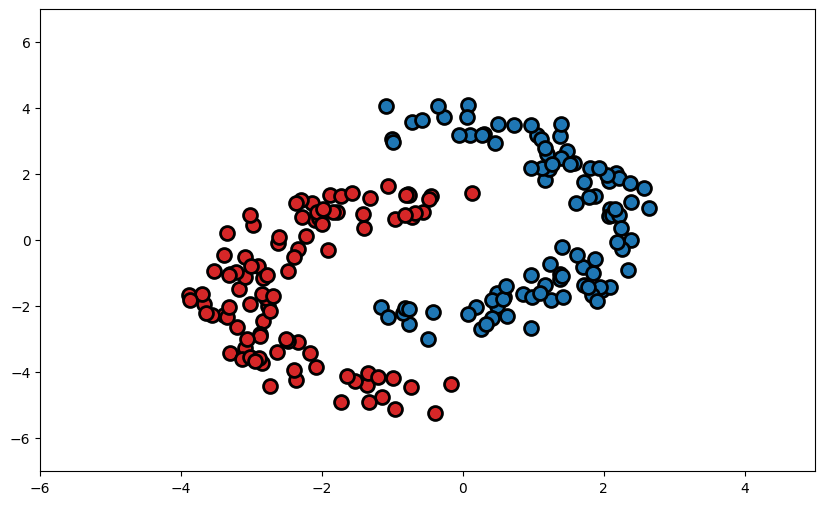

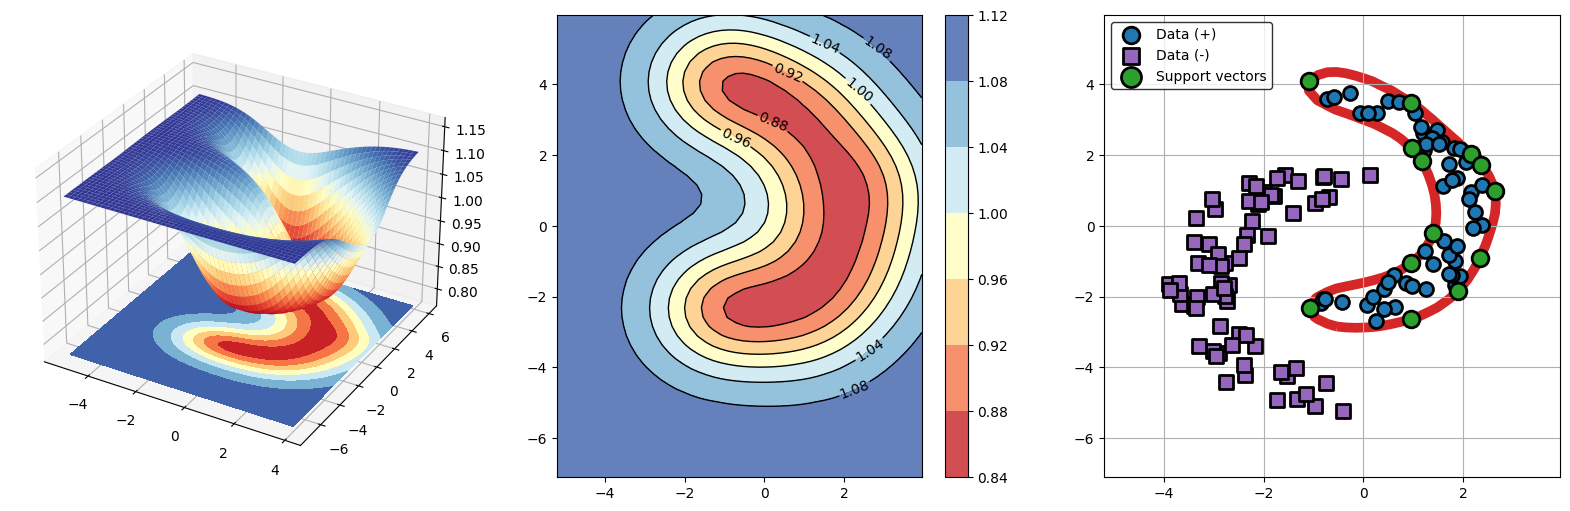



*** Fitting of the SVDD model is completed. ***

running time         = 0.0979 seconds
kernel function      = poly
iterations           = 12
number of samples    = 140
number of features   = 2
number of SVs        = 7
ratio of SVs         = 5.0000 %
accuracy             = 75.0000 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.1250 seconds



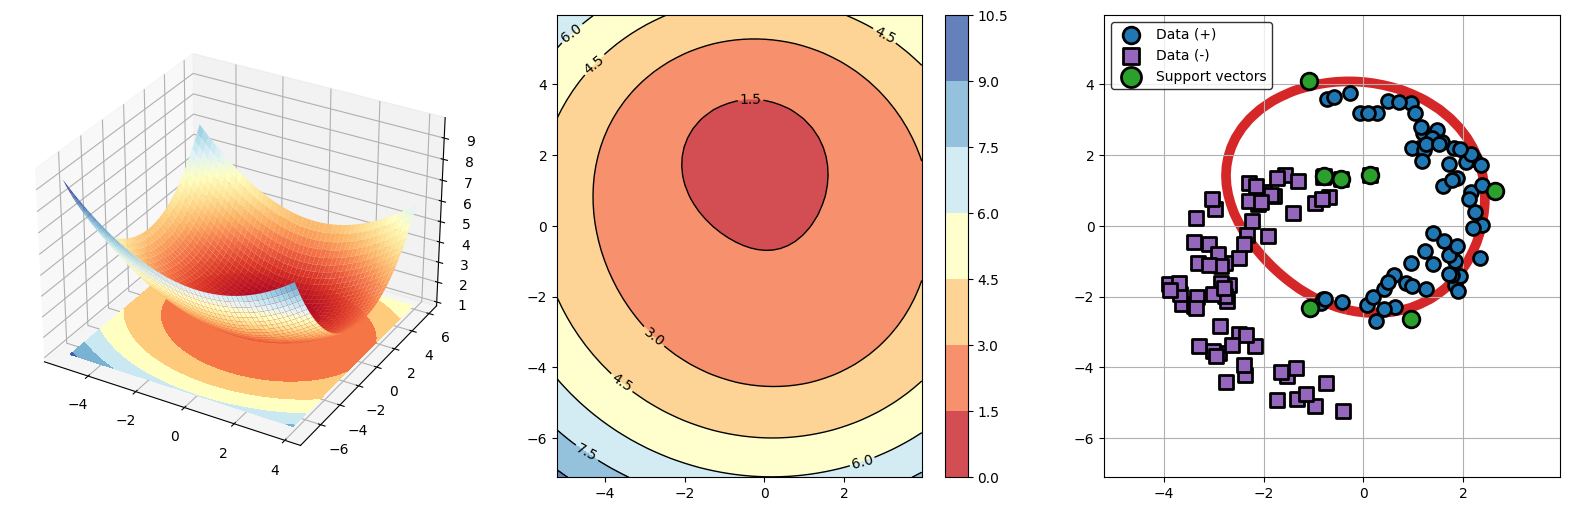



*** Fitting of the SVDD model is completed. ***

running time         = 0.0812 seconds
kernel function      = linear
iterations           = 10
number of samples    = 140
number of features   = 2
number of SVs        = 2
ratio of SVs         = 1.4286 %
accuracy             = 73.5714 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.1046 seconds



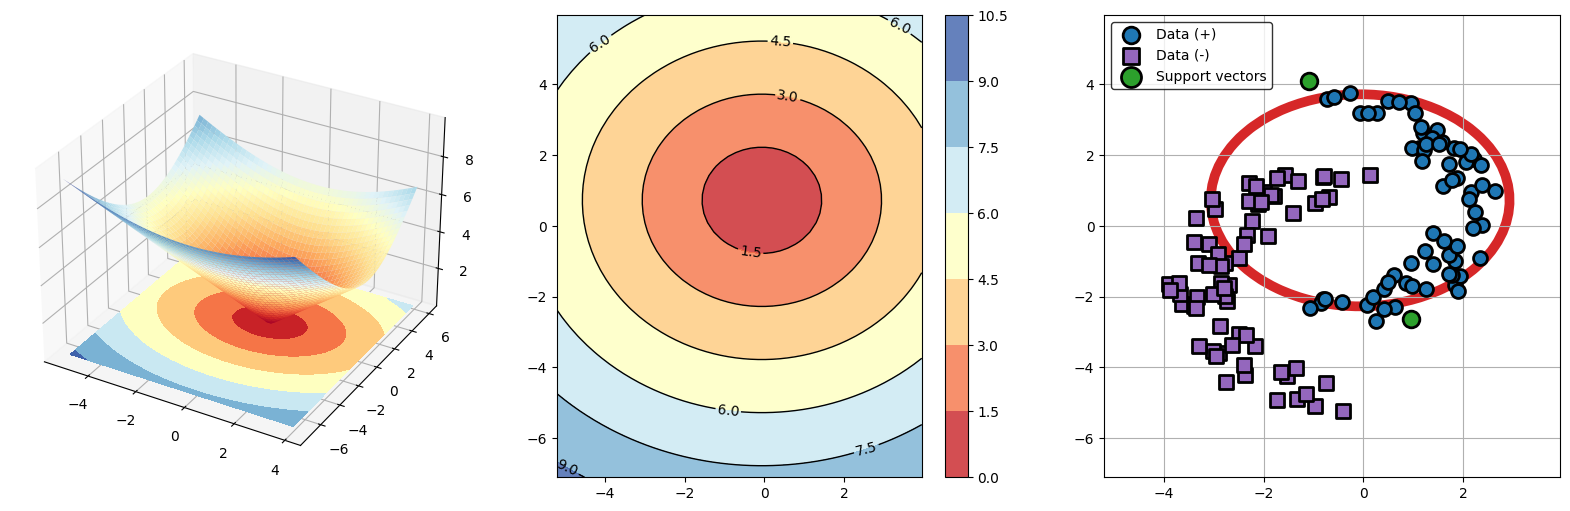

In [ ]:
"""
An example for SVDD model fitting using different kernels
"""
import sys
sys.path.append("..")
from src.BaseSVDD import BaseSVDD, BananaDataset

# Banana-shaped dataset generation and partitioning
X, y = BananaDataset.generate(number=100, display='on')
X_train, X_test, y_train, y_test = BananaDataset.split(X, y, ratio=0.3)

# kernel list
kernelList = {"1": BaseSVDD(C=0.9, kernel='rbf', gamma=0.3, display='on'),
              "2": BaseSVDD(C=0.9, kernel='poly',degree=2, display='on'),
              "3": BaseSVDD(C=0.9, kernel='linear', display='on')
              }

#
for i in range(len(kernelList)):
    svdd = kernelList.get(str(i+1))
    svdd.fit(X_train,  y_train)
    svdd.plot_boundary(X_train,  y_train)

### SVDD Model Fitting with Unlabeled Data



*** Fitting of the SVDD model is completed. ***

running time         = 0.0498 seconds
kernel function      = rbf
iterations           = 11
number of samples    = 100
number of features   = 2
number of SVs        = 11
ratio of SVs         = 11.0000 %
accuracy             = 97.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.0075 seconds
number of samples    = 100
number of alarm      = 3


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.2830 seconds



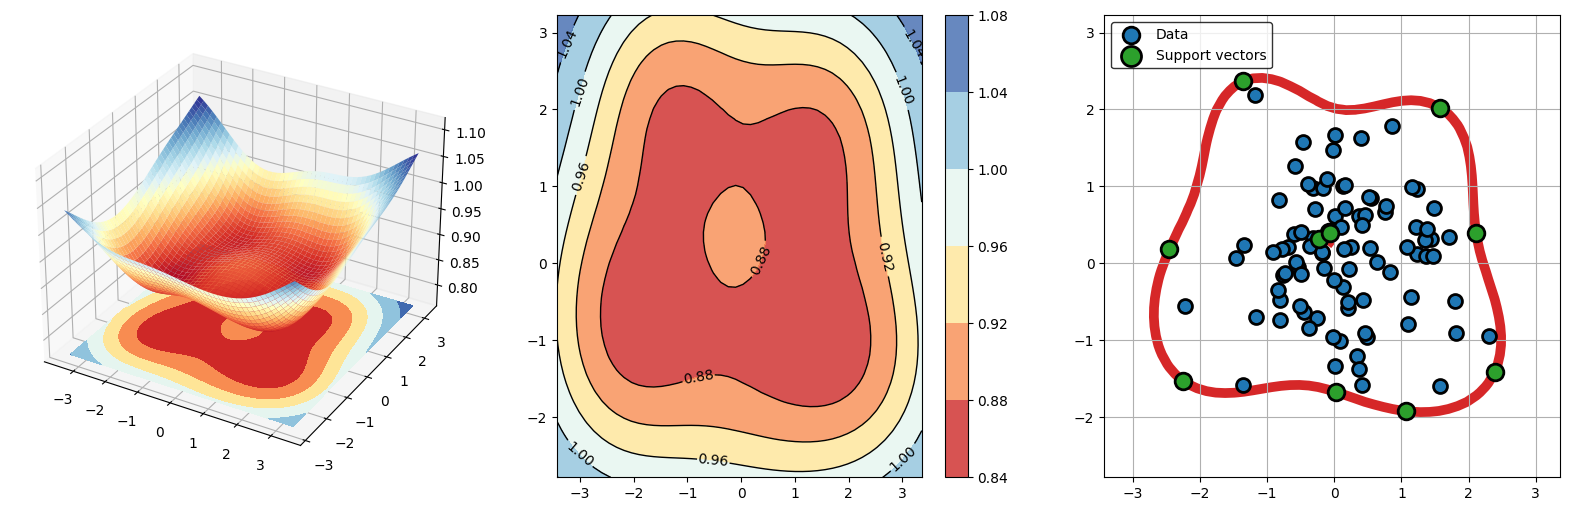

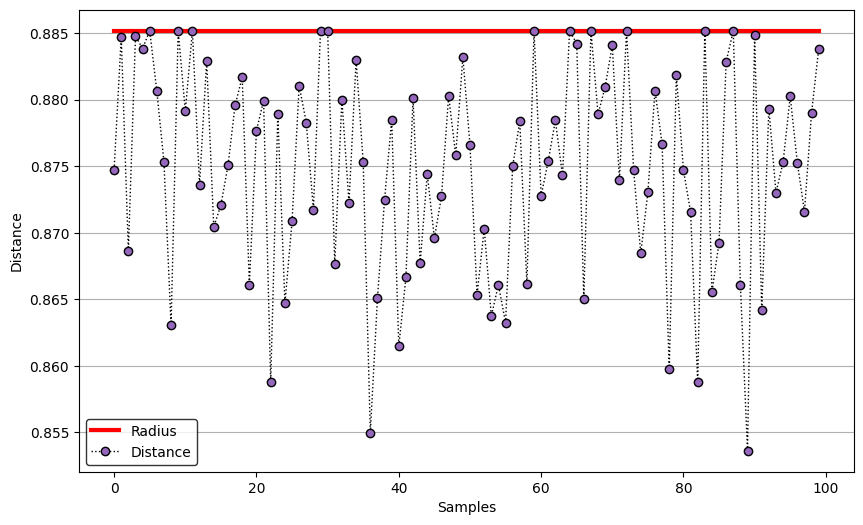

In [ ]:
"""
An example for SVDD model fitting with negataive samples
"""
import sys
sys.path.append("..")
import numpy as np
from src.BaseSVDD import BaseSVDD

# create 100 points with 2 dimensions
n = 100
dim = 2
X = np.r_[np.random.randn(n, dim)]

# svdd object using rbf kernel
svdd = BaseSVDD(C=0.9, gamma=0.3, kernel='rbf', display='on')

# fit the SVDD model
svdd.fit(X)

# predict the label
y_predict = svdd.predict(X)

# plot the boundary
svdd.plot_boundary(X)

# plot the distance
radius = svdd.radius
distance = svdd.get_distance(X)
svdd.plot_distance(radius, distance)